In [1]:
import numpy as np
import pandas as pd
import pyarrow as pa
import matplotlib.pyplot as plt
from modules import etl
import seaborn as sbn

In [2]:
data = pd.read_csv("data/data_project_metset.csv", sep=";", dtype_backend='pyarrow', engine='pyarrow')
codebook = pd.read_json("data/codebook.json", dtype_backend='pyarrow')
pa_string = pd.ArrowDtype(pa.string())
nan = [0, -66, -77, -99, '0', '-66', '-77', '-99']

In [3]:
etl = etl.Etl(codebook=codebook, data=data)

In [4]:
print(data.dtypes)
print('--------')
print(codebook.dtypes)


lfdn             int64[pyarrow]
external_lfdn    int64[pyarrow]
tester           int64[pyarrow]
dispcode         int64[pyarrow]
lastpage         int64[pyarrow]
                      ...      
rts7288986       int64[pyarrow]
rts7288987       int64[pyarrow]
rts7288988       int64[pyarrow]
rts7288989       int64[pyarrow]
rts7288990       int64[pyarrow]
Length: 283, dtype: object
--------
group_id         string[pyarrow]
main_question    string[pyarrow]
items                     object
options                   object
dtype: object


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Columns: 283 entries, lfdn to rts7288990
dtypes: int64[pyarrow](267), string[pyarrow](16)
memory usage: 2.5 MB


In [6]:
data.head(10)

,lfdn,external_lfdn,tester,dispcode,lastpage,quality,duration,p_0001,browser,referer,...,rts7288979,rts7288980,rts7288981,rts7288982,rts7288983,rts7288986,rts7288987,rts7288988,rts7288989,rts7288990
0,5,0,0,31,7288991,-77,456,testJZ3,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,https://norstatsurveys.com/,...,341,353,364,380,412,418,428,440,452,456
1,7,0,0,31,7288991,-77,1717,1199209,Mozilla/5.0 (Linux; Android 13; SM-G998B) Appl...,https://norstatsurveys.com/,...,1055,1100,1154,1218,1349,1412,1485,1615,1710,1717
2,8,0,0,31,7288991,-77,598,101222,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,-99,...,344,357,380,426,479,495,526,569,596,598
3,9,0,0,32,7288991,-77,-1,100212,Mozilla/5.0 (Linux; Android 13; SAMSUNG SM-G99...,https://norstatsurveys.com/,...,4023,4036,4081,4134,4206,4246,4300,4363,4394,4397
4,11,0,0,31,7288991,-77,1127,1184194,Mozilla/5.0 (Linux; Android 11; SAMSUNG SM-A32...,https://norstatsurveys.com/,...,542,562,623,687,823,909,1011,1096,1122,1127
5,12,0,0,31,7288991,-77,508,101828,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,https://norstatsurveys.com/,...,230,239,267,304,354,376,421,464,504,508
6,13,0,0,31,7288991,-77,1748,102939,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,https://norstatsurveys.com/,...,1200,1216,1275,1313,1452,1522,1664,1705,1745,1748
7,16,0,0,31,7288991,-77,1367,1193203,Mozilla/5.0 (Linux; Android 9; ANE-LX1) AppleW...,https://norstatsurveys.com/,...,907,942,987,1049,1142,1198,1253,1336,1362,1367
8,17,0,0,31,7288991,-77,732,1171181,Mozilla/5.0 (Linux; Android 12; M2101K7BNY) Ap...,https://norstatsurveys.com/,...,408,422,462,519,594,623,648,702,726,732
9,18,0,0,31,7288991,-77,886,103040,Mozilla/5.0 (iPhone; CPU iPhone OS 16_0 like M...,https://norstatsurveys.com/,...,528,549,591,641,707,746,810,866,883,886


In [7]:
df = data.copy()

In [8]:
# Drop rts - no encoding information
columns_to_drop = df.filter(regex=r'^rts\d+').columns

df = df.drop(columns=columns_to_drop)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Columns: 260 entries, lfdn to v_2920
dtypes: int64[pyarrow](244), string[pyarrow](16)
memory usage: 2.3 MB


In [10]:
df.head(10)

,lfdn,external_lfdn,tester,dispcode,lastpage,quality,duration,p_0001,browser,referer,...,v_2933,v_1658,v_1659,v_1660,v_1661,v_1662,v_1663,v_1664,v_1665,v_2920
0,5,0,0,31,7288991,-77,456,testJZ3,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,https://norstatsurveys.com/,...,5,2,4,4,1,5,3,5,3,test
1,7,0,0,31,7288991,-77,1717,1199209,Mozilla/5.0 (Linux; Android 13; SM-G998B) Appl...,https://norstatsurveys.com/,...,3,2,2,5,2,1,3,3,2,-99
2,8,0,0,31,7288991,-77,598,101222,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,-99,...,5,3,1,4,3,2,1,3,3,-99
3,9,0,0,32,7288991,-77,-1,100212,Mozilla/5.0 (Linux; Android 13; SAMSUNG SM-G99...,https://norstatsurveys.com/,...,3,1,1,5,4,1,1,4,2,-99
4,11,0,0,31,7288991,-77,1127,1184194,Mozilla/5.0 (Linux; Android 11; SAMSUNG SM-A32...,https://norstatsurveys.com/,...,5,2,2,5,4,2,1,4,1,-99
5,12,0,0,31,7288991,-77,508,101828,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,https://norstatsurveys.com/,...,5,2,1,5,5,2,1,4,1,-99
6,13,0,0,31,7288991,-77,1748,102939,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,https://norstatsurveys.com/,...,2,1,2,5,5,1,1,5,1,-99
7,16,0,0,31,7288991,-77,1367,1193203,Mozilla/5.0 (Linux; Android 9; ANE-LX1) AppleW...,https://norstatsurveys.com/,...,3,3,1,5,4,1,2,5,3,-99
8,17,0,0,31,7288991,-77,732,1171181,Mozilla/5.0 (Linux; Android 12; M2101K7BNY) Ap...,https://norstatsurveys.com/,...,3,3,2,3,3,2,2,4,2,-99
9,18,0,0,31,7288991,-77,886,103040,Mozilla/5.0 (iPhone; CPU iPhone OS 16_0 like M...,https://norstatsurveys.com/,...,4,1,1,5,5,1,1,5,1,-99


In [11]:
df.lastpage.agg([
    'nunique'
])

nunique    1
Name: lastpage, dtype: int64

In [12]:
df.agg([
    'nunique'
])

,lfdn,external_lfdn,tester,dispcode,lastpage,quality,duration,p_0001,browser,referer,...,v_2933,v_1658,v_1659,v_1660,v_1661,v_1662,v_1663,v_1664,v_1665,v_2920
nunique,960,1,1,2,1,1,702,957,482,23,...,5,5,5,5,5,5,5,5,5,120


In [13]:
# Drop columns with single realization
cols_to_drop = df.columns[df.nunique() == 1]
df = df.drop(columns=cols_to_drop)
print(f"Dropped columns: {list(cols_to_drop)}")

Dropped columns: ['external_lfdn', 'tester', 'lastpage', 'quality', 'device_type', 'quota_rejected_id', 'output_mode', 'javascript', 'flash', 'language', 'cleaned', 'date_of_first_mail', 'v_2889', 'v_2890', 'v_2891', 'v_2892', 'v_1754']


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Columns: 243 entries, lfdn to v_2920
dtypes: int64[pyarrow](228), string[pyarrow](15)
memory usage: 2.2 MB


In [15]:
# Replace coded missing values with NA
df = df.replace(nan, pd.NA)

In [16]:
df.isna().sum()

lfdn          0
dispcode      0
duration      0
p_0001        0
browser       0
           ... 
v_1662        0
v_1663        0
v_1664        0
v_1665        0
v_2920      810
Length: 243, dtype: int64

In [17]:
items = etl.get_items()

In [18]:
df.dtypes



lfdn         int64[pyarrow]
dispcode     int64[pyarrow]
duration     int64[pyarrow]
p_0001      string[pyarrow]
browser     string[pyarrow]
                 ...       
v_1662       int64[pyarrow]
v_1663       int64[pyarrow]
v_1664       int64[pyarrow]
v_1665       int64[pyarrow]
v_2920      string[pyarrow]
Length: 243, dtype: object

In [19]:
df['lfdn'].max()
df['lfdn'] = df['lfdn'].astype('uint16[pyarrow]')
df.dtypes

lfdn        uint16[pyarrow]
dispcode     int64[pyarrow]
duration     int64[pyarrow]
p_0001      string[pyarrow]
browser     string[pyarrow]
                 ...       
v_1662       int64[pyarrow]
v_1663       int64[pyarrow]
v_1664       int64[pyarrow]
v_1665       int64[pyarrow]
v_2920      string[pyarrow]
Length: 243, dtype: object

In [20]:
etl.get_item_options('v_1662')
df['v_1662'] = df['v_1662'].astype('category').cat.as_ordered()


In [21]:
df['dispcode'] = df['dispcode'].astype('uint8[pyarrow]')
df.dtypes

lfdn        uint16[pyarrow]
dispcode     uint8[pyarrow]
duration     int64[pyarrow]
p_0001      string[pyarrow]
browser     string[pyarrow]
                 ...       
v_1662             category
v_1663       int64[pyarrow]
v_1664       int64[pyarrow]
v_1665       int64[pyarrow]
v_2920      string[pyarrow]
Length: 243, dtype: object

In [22]:
df['duration'] = data['duration']

In [23]:
df['duration'] = pd.to_timedelta(df['duration'], unit='s').astype('duration[s][pyarrow]')

In [24]:
df.drop(columns=['p_0001', 'page_history', 'session_id', 'dispcode', 'referer', 'hflip', 'vflip'])

,lfdn,duration,browser,quota,quota_assignment,ats,datetime,date_of_last_access,v_1752,v_1751,...,v_2933,v_1658,v_1659,v_1660,v_1661,v_1662,v_1663,v_1664,v_1665,v_2920
0,5,0 days 00:07:36,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,1,"1,4,5",1676287857,13.02.2023 11:30,13.02.2023 11:38,2,27,...,5,2,4,4,1,5,3,5,3,test
1,7,0 days 00:28:37,Mozilla/5.0 (Linux; Android 13; SM-G998B) Appl...,2,"2,6,4",1676289727,13.02.2023 12:02,13.02.2023 12:30,2,30,...,3,2,2,5,2,1,3,3,2,<NA>
2,8,0 days 00:09:58,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,2,"2,7,4",1676290139,13.02.2023 12:08,13.02.2023 12:18,2,48,...,5,3,1,4,3,2,1,3,3,<NA>
3,9,-1 days +23:59:59,Mozilla/5.0 (Linux; Android 13; SAMSUNG SM-G99...,7,"7,1,4",1676290395,13.02.2023 12:13,13.02.2023 13:26,2,44,...,3,1,1,5,4,1,1,4,2,<NA>
4,11,0 days 00:18:47,Mozilla/5.0 (Linux; Android 11; SAMSUNG SM-A32...,3,"3,6,2",1676290922,13.02.2023 12:22,13.02.2023 12:40,1,34,...,5,2,2,5,4,2,1,4,1,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,1897,0 days 00:24:13,Mozilla/5.0 (Linux; Android 12; SAMSUNG SM-A52...,6,"6,3,2",1677092281,22.02.2023 18:58,22.02.2023 19:22,1,39,...,4,1,1,1,3,2,1,5,1,<NA>
956,1916,0 days 00:16:31,Mozilla/5.0 (iPhone; CPU iPhone OS 16_3_1 like...,6,"6,4,2",1677095348,22.02.2023 19:49,22.02.2023 20:05,2,39,...,3,3,3,2,3,3,3,2,3,<NA>
957,1968,0 days 00:11:34,Mozilla/5.0 (Linux; Android 10; LM-G710) Apple...,6,"6,4,2",1677107296,22.02.2023 23:08,22.02.2023 23:19,2,37,...,4,2,1,5,4,2,4,5,1,<NA>
958,2034,0 days 00:46:27,Mozilla/5.0 (iPad; CPU OS 15_4 like Mac OS X) ...,6,"6,4,2",1677146879,23.02.2023 10:07,23.02.2023 10:54,2,37,...,5,1,1,5,4,3,4,3,2,"Danke für diese Umfrage, war sehr toll und int..."


In [25]:
df['datetime'] = pd.to_datetime(df['datetime'], dayfirst=True).astype('timestamp[s][pyarrow]')
df['datetime']

0      2023-02-13 11:30:00
1      2023-02-13 12:02:00
2      2023-02-13 12:08:00
3      2023-02-13 12:13:00
4      2023-02-13 12:22:00
              ...         
955    2023-02-22 18:58:00
956    2023-02-22 19:49:00
957    2023-02-22 23:08:00
958    2023-02-23 10:07:00
959    2023-02-23 11:20:00
Name: datetime, Length: 960, dtype: timestamp[s][pyarrow]

In [26]:
df['date_of_last_access'] = pd.to_datetime(df['date_of_last_access'], dayfirst=True).astype('timestamp[s][pyarrow]')
df['date_of_last_access']

0      2023-02-13 11:38:00
1      2023-02-13 12:30:00
2      2023-02-13 12:18:00
3      2023-02-13 13:26:00
4      2023-02-13 12:40:00
              ...         
955    2023-02-22 19:22:00
956    2023-02-22 20:05:00
957    2023-02-22 23:19:00
958    2023-02-23 10:54:00
959    2023-02-23 11:33:00
Name: date_of_last_access, Length: 960, dtype: timestamp[s][pyarrow]

In [27]:
df.columns

Index(['lfdn', 'dispcode', 'duration', 'p_0001', 'browser', 'referer', 'quota',
       'quota_assignment', 'page_history', 'hflip',
       ...
       'v_2933', 'v_1658', 'v_1659', 'v_1660', 'v_1661', 'v_1662', 'v_1663',
       'v_1664', 'v_1665', 'v_2920'],
      dtype='object', length=243)

In [28]:
df = df.replace([0, -66, -77, -99, '0', '-66', '-77', '-99'], pd.NA)

In [29]:
df.columns.to_list()

['lfdn',
 'dispcode',
 'duration',
 'p_0001',
 'browser',
 'referer',
 'quota',
 'quota_assignment',
 'page_history',
 'hflip',
 'vflip',
 'session_id',
 'ats',
 'datetime',
 'date_of_last_access',
 'v_1752',
 'v_1751',
 'v_1749',
 'v_1750',
 'v_1747',
 'v_1748',
 'v_1753',
 'v_1762',
 'v_2937',
 'v_2938',
 'dupl1_v_69',
 'v_71',
 'v_2851',
 'v_2852',
 'v_2853',
 'v_2854',
 'v_2855',
 'v_2856',
 'v_1709',
 'v_1710',
 'v_1711',
 'v_1712',
 'v_1713',
 'v_1714',
 'v_1715',
 'v_1717',
 'v_1718',
 'v_1720',
 'v_1722',
 'v_1724',
 'v_1726',
 'v_1728',
 'v_1730',
 'v_1732',
 'v_1734',
 'v_1707',
 'v_1719',
 'v_2894',
 'v_2895',
 'v_2896',
 'v_2897',
 'v_2898',
 'v_2899',
 'v_2900',
 'v_2901',
 'v_2902',
 'v_2903',
 'v_2904',
 'v_2905',
 'v_2906',
 'v_2907',
 'v_2908',
 'v_2909',
 'v_2910',
 'v_2911',
 'v_2918',
 'v_2702',
 'v_2703',
 'v_2704',
 'v_2705',
 'v_2706',
 'v_2707',
 'v_2708',
 'v_2709',
 'v_2710',
 'v_2711',
 'v_2712',
 'v_2713',
 'v_2714',
 'v_2715',
 'v_2716',
 'v_2717',
 'v_2718

In [30]:
df['browser'] = df['browser'].astype(pa_string)
df['browser']

0      Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...
1      Mozilla/5.0 (Linux; Android 13; SM-G998B) Appl...
2      Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...
3      Mozilla/5.0 (Linux; Android 13; SAMSUNG SM-G99...
4      Mozilla/5.0 (Linux; Android 11; SAMSUNG SM-A32...
                             ...                        
955    Mozilla/5.0 (Linux; Android 12; SAMSUNG SM-A52...
956    Mozilla/5.0 (iPhone; CPU iPhone OS 16_3_1 like...
957    Mozilla/5.0 (Linux; Android 10; LM-G710) Apple...
958    Mozilla/5.0 (iPad; CPU OS 15_4 like Mac OS X) ...
959    Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
Name: browser, Length: 960, dtype: string[pyarrow]

In [31]:
etl.get_item_options('v_1752')
df['v_1752'] = df['v_1752'].astype('category')
df['v_1752']

0      2
1      2
2      2
3      2
4      1
      ..
955    1
956    2
957    2
958    2
959    2
Name: v_1752, Length: 960, dtype: category
Categories (3, int64[pyarrow]): [1, 2, 4]

In [32]:
nominal_q = []
for item in etl.get_items():
    if etl.get_item_type(item) == 'nominal':
        nominal_q.append(item)
nominal_q


['v_1752',
 'v_1753',
 'v_1747',
 'v_1762',
 'v_2937',
 'v_1709',
 'v_1710',
 'v_1711',
 'v_1712',
 'v_1713',
 'v_1714',
 'v_1715',
 'v_1717',
 'v_1718',
 'v_1720',
 'v_1722',
 'v_1724',
 'v_1726',
 'v_1728',
 'v_1730',
 'v_1732',
 'v_1734',
 'v_2936']

In [33]:
ordinal_q = []
for item in etl.get_items():
    if etl.get_item_type(item) == 'ordinal':
        ordinal_q.append(item)

ordinal_q

['v_1749',
 'v_2851',
 'v_2852',
 'v_2853',
 'v_2854',
 'v_2855',
 'v_2856',
 'v_2894',
 'v_2895',
 'v_2896',
 'v_2897',
 'v_2898',
 'v_2899',
 'v_2900',
 'v_2901',
 'v_2902',
 'v_2903',
 'v_2904',
 'v_2905',
 'v_2906',
 'v_2907',
 'v_2908',
 'v_2909',
 'v_2910',
 'v_2702',
 'v_2703',
 'v_2704',
 'v_2705',
 'v_2706',
 'v_2707',
 'v_2708',
 'v_2709',
 'v_2710',
 'v_2711',
 'v_2712',
 'v_2713',
 'v_2714',
 'v_2715',
 'v_2716',
 'v_2717',
 'v_2718',
 'v_2756',
 'v_2757',
 'v_2758',
 'v_2759',
 'v_2760',
 'v_2761',
 'v_2762',
 'v_2763',
 'v_2764',
 'v_2765',
 'v_2766',
 'v_2767',
 'v_2768',
 'v_2769',
 'v_2770',
 'v_2771',
 'v_2772',
 'v_2720',
 'v_2721',
 'v_2722',
 'v_2723',
 'v_2724',
 'v_2725',
 'v_2726',
 'v_2727',
 'v_2728',
 'v_2729',
 'v_2730',
 'v_2731',
 'v_2732',
 'v_2733',
 'v_2734',
 'v_2735',
 'v_2736',
 'v_2738',
 'v_2739',
 'v_2740',
 'v_2741',
 'v_2742',
 'v_2743',
 'v_2744',
 'v_2745',
 'v_2746',
 'v_2747',
 'v_2748',
 'v_2749',
 'v_2750',
 'v_2751',
 'v_2752',
 'v_2753',

In [34]:
metric_q = []
for item in etl.get_items():
    if etl.get_item_type(item) == 'metric':
        metric_q.append(item)

metric_q

['v_1751', 'dupl1_v_69']

In [35]:
df[nominal_q] = df[nominal_q].astype('category')

In [36]:
df[nominal_q].dtypes

v_1752    category
v_1753    category
v_1747    category
v_1762    category
v_2937    category
v_1709    category
v_1710    category
v_1711    category
v_1712    category
v_1713    category
v_1714    category
v_1715    category
v_1717    category
v_1718    category
v_1720    category
v_1722    category
v_1724    category
v_1726    category
v_1728    category
v_1730    category
v_1732    category
v_1734    category
v_2936    category
dtype: object

In [37]:
df1 = df.copy()

In [38]:
ordinal_q.remove('v_1754')

'v_1754' in ordinal_q

False

In [39]:
df1[ordinal_q] = df1[ordinal_q].astype('category')

In [40]:
for col in ordinal_q:
    if col in df1.columns:
        df1[col] = df1[col].cat.as_ordered()

In [41]:
df1[ordinal_q].dtypes

v_1749    category
v_2851    category
v_2852    category
v_2853    category
v_2854    category
            ...   
v_1646    category
v_1647    category
v_2931    category
v_2932    category
v_2933    category
Length: 187, dtype: object

In [42]:
free_text = []
for item in etl.get_items():
    if etl.get_item_type(item) == 'free_text':
        free_text.append(item)
free_text

['v_2920',
 'v_1750',
 'v_1748',
 'v_2938',
 'v_1707',
 'v_1719',
 'v_2911',
 'v_2918',
 'v_2719',
 'v_2773',
 'v_2737',
 'v_2755',
 'v_2799',
 'v_2809',
 'v_2919']

In [43]:
df1[free_text] = df1[free_text].astype(pa_string)

In [44]:
df1[free_text].dtypes

v_2920    string[pyarrow]
v_1750    string[pyarrow]
v_1748    string[pyarrow]
v_2938    string[pyarrow]
v_1707    string[pyarrow]
v_1719    string[pyarrow]
v_2911    string[pyarrow]
v_2918    string[pyarrow]
v_2719    string[pyarrow]
v_2773    string[pyarrow]
v_2737    string[pyarrow]
v_2755    string[pyarrow]
v_2799    string[pyarrow]
v_2809    string[pyarrow]
v_2919    string[pyarrow]
dtype: object

In [45]:
df[metric_q].dtypes

v_1751        int64[pyarrow]
dupl1_v_69    int64[pyarrow]
dtype: object

In [46]:
df[['v_1751', 'dupl1_v_69']].max()

v_1751        60
dupl1_v_69     9
dtype: int64[pyarrow]

In [47]:
df[['v_1751', 'dupl1_v_69']].min()

v_1751        18
dupl1_v_69     1
dtype: int64[pyarrow]

In [48]:
np.iinfo('uint8')

iinfo(min=0, max=255, dtype=uint8)

In [49]:
df1[metric_q] = df[metric_q].astype('uint8[pyarrow]')

In [50]:
df1[metric_q].dtypes

v_1751        uint8[pyarrow]
dupl1_v_69    uint8[pyarrow]
dtype: object

In [51]:
print(list(df1.dtypes))

[uint16[pyarrow], uint8[pyarrow], duration[s][pyarrow], string[pyarrow], string[pyarrow], string[pyarrow], int64[pyarrow], string[pyarrow], string[pyarrow], int64[pyarrow], int64[pyarrow], string[pyarrow], int64[pyarrow], timestamp[s][pyarrow], timestamp[s][pyarrow], CategoricalDtype(categories=[1, 2, 4], ordered=False, categories_dtype=int64[pyarrow]), uint8[pyarrow], CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8], ordered=True, categories_dtype=int64[pyarrow]), string[pyarrow], CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ordered=False, categories_dtype=int64[pyarrow]), string[pyarrow], CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9], ordered=False, categories_dtype=int64[pyarrow]), CategoricalDtype(categories=[1, 2, 3], ordered=False, categories_dtype=int64[pyarrow]), CategoricalDtype(categories=[1, 2, 3, 6], ordered=False, categories_dtype=int64[pyarrow]), string[pyarrow], uint8[pyarrow], int64[pyarrow], CategoricalDtype(categories=[1, 2, 3, 4, 5], ord

In [52]:
print(list(df1[ordinal_q].dtypes))

[CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8], ordered=True, categories_dtype=int64[pyarrow]), CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True, categories_dtype=int64[pyarrow]), CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True, categories_dtype=int64[pyarrow]), CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True, categories_dtype=int64[pyarrow]), CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True, categories_dtype=int64[pyarrow]), CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True, categories_dtype=int64[pyarrow]), CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True, categories_dtype=int64[pyarrow]), CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12], ordered=True, categories_dtype=int64[pyarrow]), CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 11, 12], ordered=True, categories_dtype=int64[pyarrow]), CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ordered=True, categories_dtype=int64[pyarrow]),

In [53]:
df1.to_parquet('data/data_cleaned.parquet')

In [54]:
df1.isna().sum()

lfdn          0
dispcode      0
duration      0
p_0001        0
browser       0
           ... 
v_1662        0
v_1663        0
v_1664        0
v_1665        0
v_2920      810
Length: 243, dtype: int64

In [55]:
# Find rows where 'testJZ3' appears in any column of df1
rows_with_testJZ3 = df1[df1.astype(str).eq('testJZ3').any(axis=1)]
rows_with_testJZ3

,lfdn,dispcode,duration,p_0001,browser,referer,quota,quota_assignment,page_history,hflip,...,v_2933,v_1658,v_1659,v_1660,v_1661,v_1662,v_1663,v_1664,v_1665,v_2920
0,5,31,0 days 00:07:36,testJZ3,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,https://norstatsurveys.com/,1,"1,4,5","7288964,7288965,7288966,7288967,7288969,728897...",<NA>,...,5,2,4,4,1,5,3,5,3,test


In [56]:
df1 = df1.drop(rows_with_testJZ3.index)

In [57]:
corr = df1.select_dtypes(include='number').corr()

mask = abs(corr) > 0.5

In [58]:
corr[mask]

,lfdn,dispcode,duration,quota,hflip,vflip,ats,v_1751,dupl1_v_69,v_71
lfdn,1.000000,NaN,NaN,NaN,NaN,NaN,0.948881,NaN,NaN,NaN
dispcode,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quota,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.774906,NaN,NaN
hflip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vflip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ats,0.948881,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
v_1751,NaN,NaN,NaN,0.774906,NaN,NaN,NaN,1.000000,NaN,NaN
dupl1_v_69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
v_71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [59]:
df_numerical = df1

In [60]:
df_numerical.dtypes

lfdn             uint16[pyarrow]
dispcode          uint8[pyarrow]
duration    duration[s][pyarrow]
p_0001           string[pyarrow]
browser          string[pyarrow]
                    ...         
v_1662                  category
v_1663                  category
v_1664                  category
v_1665                  category
v_2920           string[pyarrow]
Length: 243, dtype: object

In [61]:
df_numerical = pd.read_parquet('data/data_cleaned.parquet')

In [62]:
list(df_numerical.dtypes)

[uint16[pyarrow],
 uint8[pyarrow],
 duration[s][pyarrow],
 string[pyarrow],
 string[pyarrow],
 string[pyarrow],
 int64[pyarrow],
 string[pyarrow],
 string[pyarrow],
 int64[pyarrow],
 int64[pyarrow],
 string[pyarrow],
 int64[pyarrow],
 timestamp[s][pyarrow],
 timestamp[s][pyarrow],
 dtype('int64'),
 uint8[pyarrow],
 dtype('int64'),
 string[pyarrow],
 dtype('int64'),
 string[pyarrow],
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 string[pyarrow],
 uint8[pyarrow],
 int64[pyarrow],
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 string[pyarrow],
 string[pyarrow],
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype

In [63]:
corr = df_numerical.select_dtypes(include='number').corr()
mask = abs(corr) > 0.5

<Axes: >

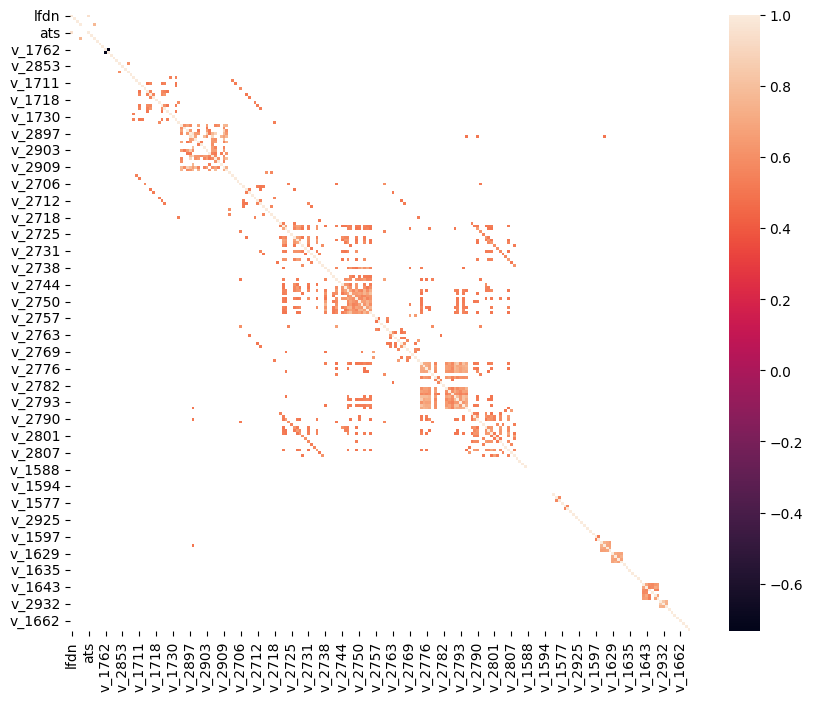

In [64]:
plt.figure(figsize=(10, 8))
sbn.heatmap(corr[mask])

In [65]:
# Get correlation matrix for numeric columns
corr_matrix = df_numerical.select_dtypes(include='number').corr()

# As a dictionary (nested, for matrix)
corr_dict = corr_matrix.to_dict()

# As a list of lists (matrix)
corr_list = corr_matrix.values.tolist()

# As a list of tuples (row, col, value) for upper triangle (excluding diagonal)
corr_tuples = [
    (row, col, corr_matrix.loc[row, col])
    for i, row in enumerate(corr_matrix.index)
    for j, col in enumerate(corr_matrix.columns)
    if j > i
]

In [66]:
# Only keep tuples where abs(correlation) > 0.5 and not 1 (exclude diagonal)
strong_corr_tuples = [(row, col, val) for (row, col, val) in corr_tuples if abs(val) > 0.5 and abs(val) != 1]
sorted(strong_corr_tuples)

[('lfdn', 'ats', np.float64(0.9488986040837584)),
 ('quota', 'v_1751', np.float64(0.7750048615167199)),
 ('v_1578', 'v_1579', np.float64(0.5716541866979893)),
 ('v_1597', 'v_1598', np.float64(0.5350802116144187)),
 ('v_1600', 'v_1601', np.float64(0.571601143328521)),
 ('v_1625', 'v_1626', np.float64(0.7361401107259932)),
 ('v_1625', 'v_1627', np.float64(0.7064287861672169)),
 ('v_1625', 'v_1628', np.float64(0.659090903027091)),
 ('v_1626', 'v_1627', np.float64(0.6828910694223804)),
 ('v_1626', 'v_1628', np.float64(0.6698375441479699)),
 ('v_1627', 'v_1628', np.float64(0.6934437447637409)),
 ('v_1629', 'v_1630', np.float64(0.7113989284719918)),
 ('v_1629', 'v_1631', np.float64(0.6857849204937307)),
 ('v_1629', 'v_1632', np.float64(0.6886379747733303)),
 ('v_1630', 'v_1631', np.float64(0.6640396610740401)),
 ('v_1630', 'v_1632', np.float64(0.7386983308823751)),
 ('v_1631', 'v_1632', np.float64(0.6717332625817851)),
 ('v_1642', 'v_1643', np.float64(0.6933146796116463)),
 ('v_1642', 'v_164

In [67]:
df.corr(numeric_only=True)

,lfdn,dispcode,quota,hflip,vflip,ats,v_1751,v_1749,dupl1_v_69,v_71,...,v_2931,v_2932,v_2933,v_1658,v_1659,v_1660,v_1661,v_1663,v_1664,v_1665
lfdn,1.000000,-0.034762,0.258976,NaN,NaN,0.948899,0.112969,0.043179,0.000244,-0.000490,...,-0.012319,-0.061510,-0.018309,0.017770,0.028282,-0.059739,-0.014287,0.053502,0.034437,-0.049976
dispcode,-0.034762,1.000000,-0.023809,NaN,NaN,-0.026218,-0.030535,0.072862,0.072855,-0.004735,...,-0.084239,-0.077268,-0.066655,-0.001594,-0.010295,-0.018695,-0.029413,-0.037028,-0.009797,0.025968
quota,0.258976,-0.023809,1.000000,NaN,NaN,0.235700,0.775005,-0.363366,-0.052064,-0.017895,...,0.029458,0.002081,0.037049,-0.035219,-0.115860,0.031309,-0.050547,-0.096454,0.041064,-0.051507
hflip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vflip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
v_1660,-0.059739,-0.018695,0.031309,NaN,NaN,-0.050290,0.135475,0.123157,-0.113038,0.120499,...,0.256472,0.260492,0.241885,-0.041414,-0.096688,1.000000,0.270220,-0.057507,0.243682,-0.015046
v_1661,-0.014287,-0.029413,-0.050547,NaN,NaN,-0.008031,0.023173,0.137246,-0.070260,0.119218,...,0.064635,0.073233,0.071332,-0.241629,-0.121765,0.270220,1.000000,-0.154099,0.281822,-0.120927
v_1663,0.053502,-0.037028,-0.096454,NaN,NaN,0.060622,-0.192063,-0.056538,-0.005466,-0.023600,...,0.087122,0.090664,0.085027,0.336745,0.331809,-0.057507,-0.154099,1.000000,-0.232770,0.241686
v_1664,0.034437,-0.009797,0.041064,NaN,NaN,0.028732,0.115579,0.054899,-0.092347,0.042112,...,0.131210,0.098385,0.130536,-0.223545,-0.160053,0.243682,0.281822,-0.232770,1.000000,-0.227920


In [68]:
df_ordinal_as_numeric = df1
df_ordinal_as_numeric[ordinal_q] = df_ordinal_as_numeric[ordinal_q].astype('uint8[pyarrow]')

In [69]:
corr = df_ordinal_as_numeric.select_dtypes(include='number').corr()
corr

,lfdn,dispcode,duration,quota,hflip,vflip,ats,v_1751,v_1749,dupl1_v_69,...,v_2932,v_2933,v_1658,v_1659,v_1660,v_1661,v_1662,v_1663,v_1664,v_1665
lfdn,1.000000,-0.035258,-0.000770,0.256385,NaN,NaN,0.948881,0.111376,0.044625,-0.001648,...,-0.063588,-0.016199,0.018378,0.033901,-0.059907,-0.016959,-0.005856,0.055729,0.036192,-0.048578
dispcode,-0.035258,1.000000,-0.379305,-0.024511,NaN,NaN,-0.026895,-0.030880,0.073139,0.072571,...,-0.077679,-0.066334,-0.001490,-0.009385,-0.018712,-0.029927,-0.018769,-0.036684,-0.009500,0.026247
duration,-0.000770,-0.379305,1.000000,0.046421,NaN,NaN,-0.000591,0.057449,0.005156,-0.014836,...,0.017740,0.015548,-0.094748,-0.079682,0.095396,0.046535,-0.068660,-0.035314,0.098001,-0.025898
quota,0.256385,-0.024511,0.046421,1.000000,NaN,NaN,0.231975,0.774906,-0.362470,-0.054924,...,-0.000688,0.040233,-0.034480,-0.109130,0.031257,-0.054490,-0.172250,-0.093784,0.043595,-0.049552
hflip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
v_1661,-0.016959,-0.029927,0.046535,-0.054490,NaN,NaN,-0.011654,0.021326,0.138928,-0.072390,...,0.071343,0.073749,-0.241366,-0.116966,0.270496,1.000000,-0.112803,-0.152236,0.284143,-0.119593
v_1662,-0.005856,-0.018769,-0.068660,-0.172250,NaN,NaN,-0.012445,-0.240070,-0.014754,-0.016315,...,0.151320,0.138131,0.380495,0.419047,-0.058301,-0.112803,1.000000,0.426679,-0.162766,0.206950
v_1663,0.055729,-0.036684,-0.035314,-0.093784,NaN,NaN,0.063697,-0.190840,-0.057764,-0.003886,...,0.092453,0.083375,0.336576,0.329486,-0.057480,-0.152236,0.426679,1.000000,-0.234529,0.240761
v_1664,0.036192,-0.009500,0.098001,0.043595,NaN,NaN,0.031122,0.116936,0.054026,-0.091192,...,0.099829,0.129284,-0.224080,-0.164720,0.243883,0.284143,-0.162766,-0.234529,1.000000,-0.229147


In [70]:
strong_corr_tuples_sorted = sorted(strong_corr_tuples, key=lambda x: abs(x[2]), reverse=True)
strong_corr_tuples_sorted

[('lfdn', 'ats', np.float64(0.9488986040837584)),
 ('v_2897', 'v_2898', np.float64(0.9452713310757863)),
 ('v_2897', 'v_2906', np.float64(0.8965707601894143)),
 ('v_2898', 'v_2905', np.float64(0.8964214570007953)),
 ('v_2896', 'v_2909', np.float64(0.883758085099455)),
 ('v_2774', 'v_2791', np.float64(0.8532699440475768)),
 ('v_2897', 'v_2903', np.float64(0.8524563175030324)),
 ('v_2931', 'v_2932', np.float64(0.8400549452405106)),
 ('v_2791', 'v_2795', np.float64(0.8147358019717736)),
 ('v_2774', 'v_2795', np.float64(0.8107780218039219)),
 ('v_2747', 'v_2754', np.float64(0.809112119398398)),
 ('v_2789', 'v_2795', np.float64(0.8081713197530407)),
 ('v_2789', 'v_2791', np.float64(0.8023771491181891)),
 ('v_2774', 'v_2789', np.float64(0.7948005539409043)),
 ('v_2906', 'v_2910', np.float64(0.7927282212622861)),
 ('v_2899', 'v_2909', np.float64(0.7910150869289272)),
 ('v_2897', 'v_2909', np.float64(0.7893181362242973)),
 ('v_2898', 'v_2902', np.float64(0.7879539149690133)),
 ('v_2775', 'v_27

In [71]:
etl.get_item_label('v_2897')

'smarte Gesundheits- und Assistenzgeräte'

In [72]:
etl.get_item_label('v_2898')

'E-Auto'

In [73]:
etl.get_single_item('v_2897')

[{'label': 'smarte Gesundheits- und Assistenzgeräte', 'type': 'ordinal'}]

In [74]:
# Suppose you have a list of encodings and a correlation matrix
encodings = list(df1.columns)  # or your list of question encodings

# Build lookup dictionaries
encoding_to_group = {}
encoding_to_main = {}
for group in etl.codebook.to_dict('records'):
    group_id = group.get('group_id', '')
    main_question = group.get('main_question', '')
    for enc in group.get('items', {}):
        encoding_to_group[enc] = group_id
        encoding_to_main[enc] = main_question

# Filter correlation tuples
filtered_corr_tuples = [
    (row, col, val)
    for (row, col, val) in corr_tuples
    if encoding_to_group.get(row) != encoding_to_group.get(col)
    and encoding_to_main.get(row) != encoding_to_main.get(col)
]

In [75]:
len(filtered_corr_tuples)

22526

In [76]:
filtered_strong_corr_tuples = [t for t in filtered_corr_tuples if abs(t[2]) > 0.5 and abs(t[2]) != 1]
filtered_strong_corr_tuples_sorted = sorted(filtered_strong_corr_tuples, key=lambda x: abs(x[2]), reverse=True)
filtered_strong_corr_tuples_sorted

[('quota', 'v_1751', np.float64(0.7750048615167199)),
 ('v_2742', 'v_2760', np.float64(0.6716617359140794)),
 ('v_2727', 'v_2798', np.float64(0.6495017634626539)),
 ('v_2723', 'v_2790', np.float64(0.6490678391905017)),
 ('v_2734', 'v_2806', np.float64(0.6489803898105609)),
 ('v_2727', 'v_2745', np.float64(0.6399101129191095)),
 ('v_2728', 'v_2800', np.float64(0.6335662530842822)),
 ('v_2728', 'v_2746', np.float64(0.6325612754323221)),
 ('v_2726', 'v_2796', np.float64(0.629857824788471)),
 ('v_2727', 'v_2746', np.float64(0.6188381641094793)),
 ('v_2736', 'v_2808', np.float64(0.6174274021775005)),
 ('v_2724', 'v_2792', np.float64(0.6127183891216597)),
 ('v_2731', 'v_2749', np.float64(0.6120947459119556)),
 ('v_2744', 'v_2796', np.float64(0.6050884969800508)),
 ('v_2730', 'v_2802', np.float64(0.6049291148406527)),
 ('v_2706', 'v_2760', np.float64(0.6024127482603133)),
 ('v_2726', 'v_2744', np.float64(0.5947815038403599)),
 ('v_2734', 'v_2752', np.float64(0.5944061351027101)),
 ('v_2746', 

In [77]:
len(strong_corr_tuples_sorted)

565

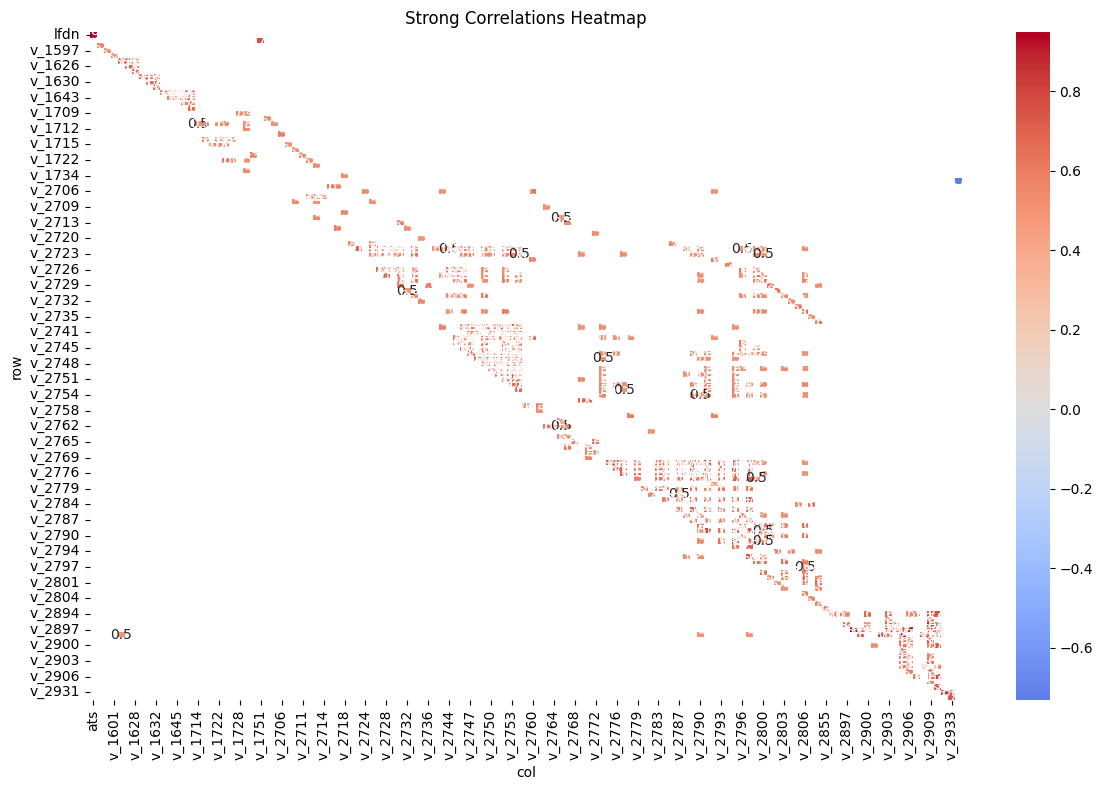

In [78]:
corr_df = pd.DataFrame(strong_corr_tuples_sorted, columns=['row', 'col', 'value'])

heatmap_data = corr_df.pivot(index='row', columns='col', values='value')

plt.figure(figsize=(12, 8))
sbn.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0)
plt.title("Strong Correlations Heatmap")
plt.tight_layout()
plt.show()